### Load in required packages



In [1]:
import pandas as pd
from datetime import datetime, timedelta
import plotly.express as px

pd.set_option('future.no_silent_downcasting', True)

In [18]:
# Import CSV with renamed columns
df = pd.read_csv("bike_data.csv")
"""
Then we looking at cleaning up the columns. We can first comment it out to see what it looks like as is and just do df after you read the csv.

"""
df
df.info()
df.describe()

# Clean up some columns
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
# df.info()

"""
Then I can do the next one by created a datetime column, which just adds the hour columns and date column to generate one datetime
"""
df["datetime"] = df["date"] + pd.to_timedelta(df["hour"], unit="h")
# df.info()

df["is_holiday"] = df["is_holiday"].replace({"No Holiday": False, "Holiday": True}).astype(bool)

df["is_functioning"] = df["is_functioning"].replace({"Yes": True, "No": False}).astype(bool)

# Similar to is_holiday, map is_functioning to True and False
# df
df.info()

"""
Now this will reduce the number of observations.
"""
df = df.query('is_functioning')
df




# Only keep observations where the system is functioning
# df = df.query('is_functioning')

# Print out the result


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 8760 non-null   object 
 1   n_rented_bikes       8760 non-null   int64  
 2   hour                 8760 non-null   int64  
 3   temperature_celsius  8760 non-null   float64
 4   humidity_pct         8760 non-null   int64  
 5   wind_speed_mps       8760 non-null   float64
 6   visibility_10m       8760 non-null   int64  
 7   dew_point_temp_c     8760 non-null   float64
 8   solar_radiation      8760 non-null   float64
 9   rainfall_mm          8760 non-null   float64
 10  snowfall_cm          8760 non-null   float64
 11  season               8760 non-null   object 
 12  is_holiday           8760 non-null   object 
 13  is_functioning       8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ KB
<class 'pandas.core.frame.Dat

,date,n_rented_bikes,hour,temperature_celsius,humidity_pct,wind_speed_mps,visibility_10m,dew_point_temp_c,solar_radiation,rainfall_mm,snowfall_cm,season,is_holiday,is_functioning,datetime
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 00:00:00
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 01:00:00
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,False,True,2017-12-01 02:00:00
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 03:00:00
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,False,True,2018-11-30 19:00:00
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,False,True,2018-11-30 20:00:00
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,False,True,2018-11-30 21:00:00
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,False,True,2018-11-30 22:00:00


### Visualize bike rentals over time

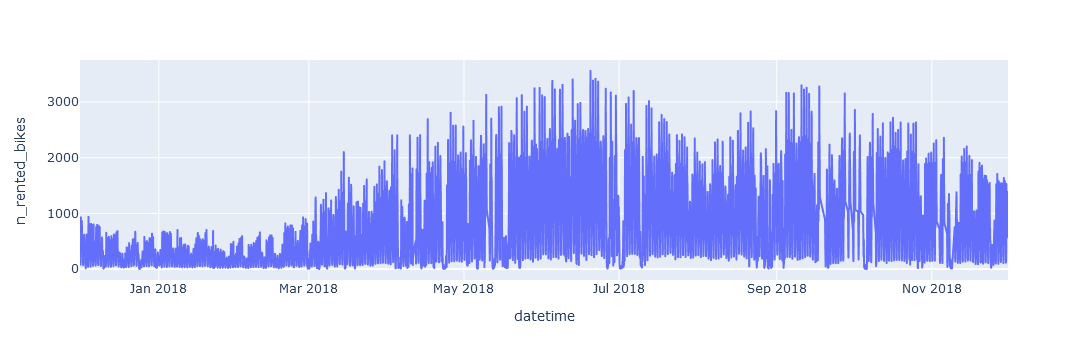

In [13]:
# Create a line plot of rented bikes over time

# df["is_weekend"] = df["date"].dt.weekday.isin([5, 6]) # Saturday (5) and Sunday (6)
px.line(df, x="datetime", y="n_rented_bikes")

In [19]:


# Calculate the total number of rented bikes per day
# So what we can do is take all the measurements for a single day and put them together and sum it, so not have each hour but combine them:
# So I am taking my df, grouping by date then suming the rented bikes then selected date and n_rented bikes
by_day = df.groupby("date", as_index=False).agg({"n_rented_bikes": "sum"})

# Create a line plot showing total number of bikes per day over time
px.line(by_day, x='date', y='n_rented_bikes')



'\nSo we can see this is way more digestable and we can see the seasonality pattern, winter time\nnot into biking then through spring increase, summer peak, maybe a dip maybe very hot July and August, maybe holiday etc.\n'

<bound method Series.unique of 0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: season, Length: 8465, dtype: object>


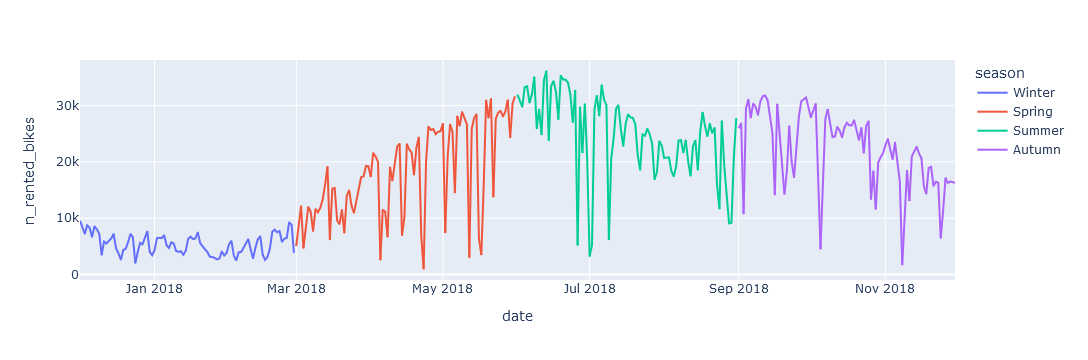

In [16]:
# Copy the previous chain of manipulations and add season as a variable to group by
by_day_season = df.groupby(["date", "season"], as_index=False).agg({"n_rented_bikes": "sum"})


# Copy the code for the previous line plot and map season to color
px.line(by_day_season, x='date', y='n_rented_bikes', color='season')

### Explore the relation between weather and rentals

In [6]:
# Query df to only keep observations at noon
noon_rides = df.query('hour == 12')

# Create a scatter plot showing temperature against number of rented bikes
# Add a trendline if you feel like it
px.scatter(noon_rides, x='temperature_celsius', y='n_rented_bikes', trendline='lowess')

In [7]:
# Copy and update the code for the previous scatter plot 
# to investigate relation with other weather parameters
"""
n_rented_bikes vs wind speed, humidity, rainfall etc...
"""


'\nn_rented_bikes vs wind speed, humidity, rainfall etc...\n'

### Explore typical daily usage pattern

In [8]:
# Calculate the average number of rented bikes per hour
time_of_day = df.groupby("hour", as_index=False).agg({"n_rented_bikes": "mean"})


# Create a bar chart showing the usage pattern
px.bar(time_of_day, x='hour', y='n_rented_bikes')

In [9]:
# Copy and adapt the previous query to take into account the season
time_of_day_season = df.groupby(["hour", "season"], as_index=False).agg({"n_rented_bikes": "mean"})


# Copy and adapt the code for the previous bar chart to show usage pattern per season
px.bar(time_of_day_season, x='hour', y='n_rented_bikes', color='season', facet_col="season")

### Extra: is New Year's Eve different?

In [10]:
# New Years dates
new_years_start = datetime(2017, 12, 31, 12)
new_years_end = datetime(2018, 1, 1, 12)

# Create data frame with new year's data
new_year = df[(df['datetime'] >= new_years_start) & (df['datetime'] <= new_years_end)]

# No need for explicit df[] indexing.
new_year = df.query("@new_years_start <= datetime <= @new_years_end")

# Show usage pattern
px.bar(new_year, x='datetime', y='n_rented_bikes')